In [1]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# Reading in pre processed excel file
df = pd.read_excel("/Users/suhayl/Data Science modules/IGP/Data/IGP_updated_data.xlsx")

In [5]:
# Changing column names
df.columns = ["Year", "Total_admissions", "maternity", "population"]
df

,Year,Total_admissions,maternity,population
0,2008-04,6918254,NaN,61823772
1,2008-05,6506145,NaN,61823772
2,2008-06,6809466,NaN,61823772
3,2008-07,7163355,NaN,61823772
4,2008-08,6134809,NaN,61823772
...,...,...,...,...
115,2017-11,9226346,56116.0,66040229
116,2017-12,7455220,54721.0,66040229
117,2018-01,8965179,56257.0,66040229
118,2018-02,8114870,51270.0,66040229


In [6]:
df["Year"] = pd.to_datetime(df["Year"])

In [7]:
new_df = df.fillna(method="bfill")
new_df.head()

,Year,Total_admissions,maternity,population
0,2008-04-01,6918254,57955.0,61823772
1,2008-05-01,6506145,57955.0,61823772
2,2008-06-01,6809466,57955.0,61823772
3,2008-07-01,7163355,57955.0,61823772
4,2008-08-01,6134809,57955.0,61823772


In [8]:
new_df.drop("maternity", axis=1, inplace=True)

In [9]:
new_df.drop("population",axis=1,inplace=True)

In [20]:
new_df.columns = ["ds", "y"]
new_df

,ds,y
0,2008-04-01,6918254
1,2008-05-01,6506145
2,2008-06-01,6809466
3,2008-07-01,7163355
4,2008-08-01,6134809
...,...,...
115,2017-11-01,9226346
116,2017-12-01,7455220
117,2018-01-01,8965179
118,2018-02-01,8114870


In [21]:
m = Prophet(interval_width = 0.95)
model = m.fit(new_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
future = m.make_future_dataframe(periods=100, freq = "M")
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-04-01,6.840071e+06,6.078827e+06,7.253698e+06,6.840071e+06,6.840071e+06,-172529.438994,-172529.438994,-172529.438994,-172529.438994,-172529.438994,-172529.438994,0.0,0.0,0.0,6.667541e+06
1,2008-05-01,6.856296e+06,6.421824e+06,7.550438e+06,6.856296e+06,6.856296e+06,162059.172110,162059.172110,162059.172110,162059.172110,162059.172110,162059.172110,0.0,0.0,0.0,7.018355e+06
2,2008-06-01,6.873062e+06,6.245352e+06,7.386235e+06,6.873062e+06,6.873062e+06,-38532.047916,-38532.047916,-38532.047916,-38532.047916,-38532.047916,-38532.047916,0.0,0.0,0.0,6.834530e+06
3,2008-07-01,6.889288e+06,6.540757e+06,7.683822e+06,6.889288e+06,6.889288e+06,229286.430446,229286.430446,229286.430446,229286.430446,229286.430446,229286.430446,0.0,0.0,0.0,7.118574e+06
4,2008-08-01,6.906054e+06,6.031121e+06,7.148527e+06,6.906054e+06,6.906054e+06,-335914.255562,-335914.255562,-335914.255562,-335914.255562,-335914.255562,-335914.255562,0.0,0.0,0.0,6.570139e+06


In [23]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
215,2026-02-28,1.003681e+07,9.895176e+06,1.106623e+07,9.734036e+06,1.030059e+07,4.802614e+05,4.802614e+05,4.802614e+05,4.802614e+05,4.802614e+05,4.802614e+05,0.0,0.0,0.0,1.051707e+07
216,2026-03-31,1.004963e+07,8.571941e+06,9.811595e+06,9.743692e+06,1.031726e+07,-8.482252e+05,-8.482252e+05,-8.482252e+05,-8.482252e+05,-8.482252e+05,-8.482252e+05,0.0,0.0,0.0,9.201410e+06
217,2026-04-30,1.006205e+07,8.657845e+06,9.923712e+06,9.749627e+06,1.033339e+07,-7.233283e+05,-7.233283e+05,-7.233283e+05,-7.233283e+05,-7.233283e+05,-7.233283e+05,0.0,0.0,0.0,9.338717e+06
218,2026-05-31,1.007487e+07,1.048422e+07,1.175507e+07,9.755813e+06,1.035009e+07,1.044543e+06,1.044543e+06,1.044543e+06,1.044543e+06,1.044543e+06,1.044543e+06,0.0,0.0,0.0,1.111941e+07
219,2026-06-30,1.008728e+07,9.804137e+06,1.108450e+07,9.761974e+06,1.036639e+07,3.823141e+05,3.823141e+05,3.823141e+05,3.823141e+05,3.823141e+05,3.823141e+05,0.0,0.0,0.0,1.046959e+07


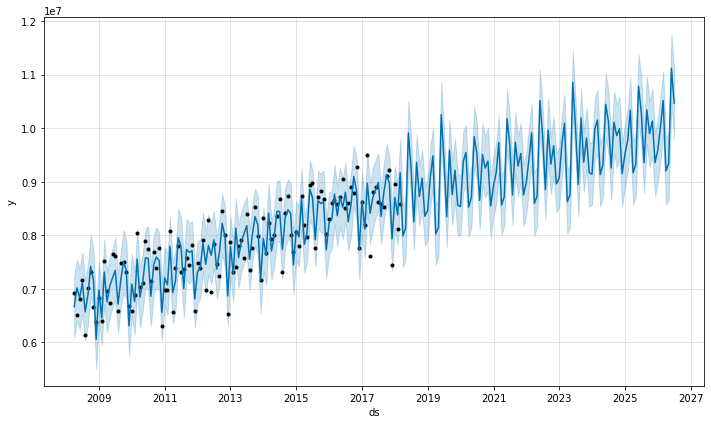

In [42]:
forecasted_values = m.plot(forecast)


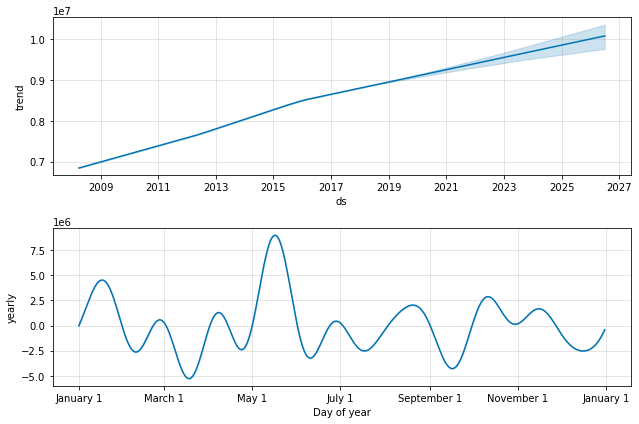

In [25]:
components = m.plot_components(forecast)

In [37]:
pd.set_option('display.max_rows', None)

In [38]:
forecast[["ds","yhat"]]

,ds,yhat
0,2008-04-01,6.667541e+06
1,2008-05-01,7.018355e+06
2,2008-06-01,6.834530e+06
3,2008-07-01,7.118574e+06
4,2008-08-01,6.570139e+06
5,2008-09-01,6.893437e+06
6,2008-10-01,7.420751e+06
7,2008-11-01,7.162369e+06
8,2008-12-01,6.059535e+06
9,2009-01-01,6.975822e+06
